<h2 align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-06-25 11:59:01.213553: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 11:59:02.372457: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 11:59:02.373999: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 11:59:11.447858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

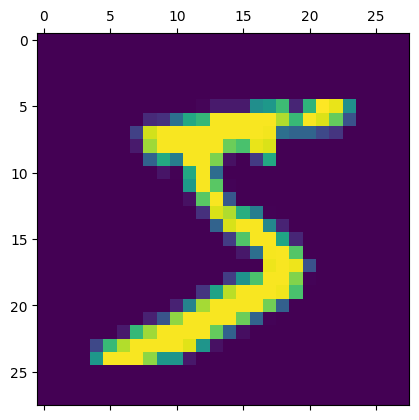

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

2023-06-25 11:59:27.233426: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2750 - accuracy: 0.9226
Epoch 2/5
  15/1875 [..............................] - ETA: 7s - loss: 0.1445 - accuracy: 0.9646

2023-06-25 11:59:36.320023: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.1244 - accuracy: 0.9632
Epoch 3/5
  48/1875 [..............................] - ETA: 6s - loss: 0.0764 - accuracy: 0.9772

2023-06-25 11:59:42.883455: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9736
Epoch 4/5
  49/1875 [..............................] - ETA: 5s - loss: 0.0682 - accuracy: 0.9758

2023-06-25 11:59:48.938404: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0653 - accuracy: 0.9797
Epoch 5/5
  46/1875 [..............................] - ETA: 6s - loss: 0.0401 - accuracy: 0.9891

2023-06-25 11:59:54.900951: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18816000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.0527 - accuracy: 0.9837


In [14]:
%load_ext tensorboard
%tensorboard --logdir logs/train

ERROR: Failed to launch TensorBoard (exited with 127).
Contents of stderr:
/home/mijanur/Desktop/AI/DL NLP/deep-learning/venv/bin/tensorboard: 2: exec: /home/mijanur/Desktop/DEEP LEARNING/deep-learning/venv/bin/python3: not found

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[-0.06175991, -0.02103661,  0.00029269, ..., -0.00105775,
         -0.07625145, -0.07867143],
        [-0.02175131, -0.03995942,  0.03640836, ..., -0.01020743,
          0.06006697,  0.00017264],
        [-0.07846686, -0.04663178,  0.00718956, ..., -0.06134988,
         -0.00331801, -0.06787493],
        ...,
        [ 0.03565432,  0.04943866,  0.01166447, ...,  0.05054621,
          0.02581601, -0.04823016],
        [ 0.00533505, -0.01390835, -0.03598362, ..., -0.00239499,
          0.04495886, -0.05216267],
        [-0.05442818,  0.02314196,  0.03838286, ...,  0.02784905,
         -0.01127762,  0.03406438]], dtype=float32),
 array([-0.10819875,  0.08884261,  0.03895784,  0.10421192, -0.06304032,
         0.03390739, -0.03177046, -0.08675589,  0.12294889, -0.08459484,
        -0.00727282,  0.12556666,  0.16235547,  0.02226699,  0.14035048,
        -0.03775923,  0.06770086,  0.03418496,  0.07276947,  0.02096713,
         0.04135311,  0.00435266, -0.0019959 , -0.05401217,  0.107